In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b8e0b523049fdcd3f9cd2e1fb9a933d490199956088193a297f6d4b74ac03c2f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



In [3]:
#In this part we want to define one of the entery word that name is healthy cell
#We set this item between lower band 0 and upper band 1 with Accuracy  of 0.05

healthy_cell = ctrl.Antecedent(np.arange(0, 1, 0.05), 'healthy_cell')


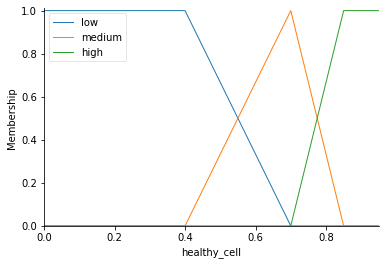

In [4]:
# Define fuzzy term low and medium and high with shape of trapezius and traingle and trapezius
# item [0,0,0.4,0.7] of shape one define vertices of shape

healthy_cell['low'] = fuzz.trapmf(healthy_cell.universe, [0,0, 0.4, 0.7])
healthy_cell['medium'] = fuzz.trimf(healthy_cell.universe, [0.4,0.7, 0.85])
healthy_cell['high'] = fuzz.trapmf(healthy_cell.universe, [0.7, 0.85,1,1])
healthy_cell.view()

In [5]:
#In this part we want to define one of the entery word that name is  cancer_cell
#We set this item between lower band 0 and upper band 1 with Accuracy  of 0.01

cancer_cell = ctrl.Antecedent(np.arange(0, 1, 0.01), 'cancer_cell')

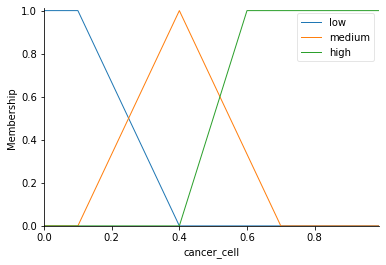

In [6]:
# Define fuzzy term low and medium and high with shape of trapezius and traingle and trapezius

cancer_cell['low'] = fuzz.trapmf(cancer_cell.universe, [0,0, 0.1, 0.4])
cancer_cell['medium'] = fuzz.trimf(cancer_cell.universe, [0.1,0.4, 0.7])
cancer_cell['high'] = fuzz.trapmf(cancer_cell.universe, [0.4,0.6, 1, 1])
cancer_cell.view()

In [7]:
#In this part we want to define our result term that name is drug doz
# it between 0,0.01 with accuracy of 0.0005
drug_doz = ctrl.Consequent(np.arange(0, 0.01, 0.0005), 'drug_doz')

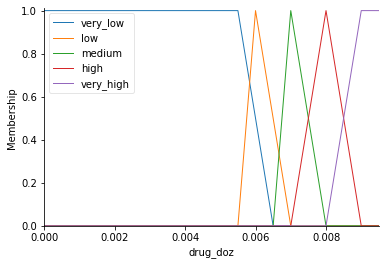

In [8]:
# we have five situation for this term .
drug_doz['very_low'] = fuzz.trapmf(drug_doz.universe, [0,0, 0.0055, 0.0065])
drug_doz['low'] = fuzz.trimf(drug_doz.universe,[0.0055,0.006,0.007])
drug_doz['medium'] = fuzz.trimf(drug_doz.universe,[0.0065,0.007,0.008])
drug_doz['high'] = fuzz.trimf(drug_doz.universe,[0.007,0.008,0.009])
drug_doz['very_high'] = fuzz.trapmf(drug_doz.universe,[0.008,0.009,0.01,0.01])
drug_doz.view()

In [9]:
# rules of this contrler with or entry and result fuzzy term
rule1 = ctrl.Rule(healthy_cell['low'] & cancer_cell['low'], drug_doz['low'])
rule2 = ctrl.Rule(healthy_cell['medium']& cancer_cell['low'], drug_doz['low'])
rule3 = ctrl.Rule(healthy_cell['high'] & cancer_cell['low'], drug_doz['very_low'])
rule4 = ctrl.Rule(healthy_cell['low'] & cancer_cell['medium'], drug_doz['medium'])
rule5 = ctrl.Rule(healthy_cell['medium']& cancer_cell['medium'], drug_doz['medium'])
rule6 = ctrl.Rule(healthy_cell['high'] & cancer_cell['medium'], drug_doz['low'])
rule7 = ctrl.Rule(healthy_cell['low'] & cancer_cell['high'], drug_doz['very_high'])
rule8 = ctrl.Rule(healthy_cell['medium']& cancer_cell['high'], drug_doz['high'])
rule9 = ctrl.Rule(healthy_cell['high'] & cancer_cell['high'], drug_doz['medium'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed2a499400>)

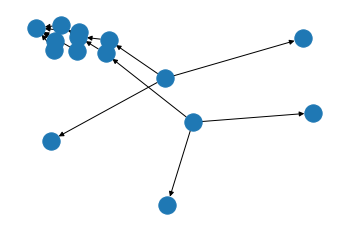

In [10]:
rule1.view()


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fed2a0469d0>)

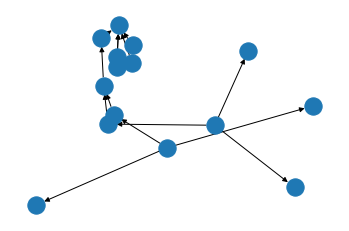

In [11]:
rule9.view()

In [12]:
duzz_healthy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])


In [13]:
duzz_healthy = ctrl.ControlSystemSimulation(duzz_healthy_ctrl)


In [18]:
duzz_healthy.input['healthy_cell'] = 0.65
duzz_healthy.input['cancer_cell'] = 0.5
duzz_healthy.compute()


0.0077813620071684585


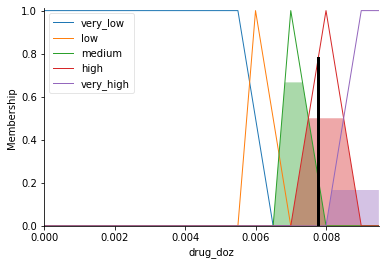

In [19]:
"""
Once computed, we can view the result as well as visualize it.
"""
print(duzz_healthy.output['drug_doz'])
drug_doz.view(sim=duzz_healthy)

In [20]:
duzz_healthy.input['healthy_cell'] = 0.5
duzz_healthy.input['cancer_cell'] = 0.65
duzz_healthy.compute()


0.008385009310986964


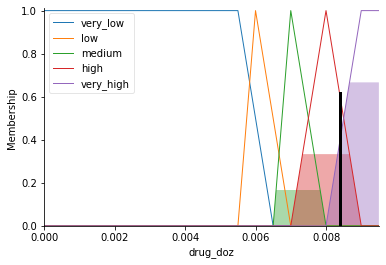

In [21]:
"""
Once computed, we can view the result as well as visualize it.
"""
print(duzz_healthy.output['drug_doz'])
drug_doz.view(sim=duzz_healthy)